In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# configs_dir = r'C:\Users\david.hensle\OneDrive - Resource Systems Group, Inc\Documents\projects\sandag\sandag_activitysim\activitysim\examples\prototype_mwcog\configs'
output_dir = r'C:\Users\david.hensle\OneDrive - Resource Systems Group, Inc\Documents\projects\sandag\sandag_activitysim\activitysim\examples\prototype_mwcog\output'
# ts_probs = pd.read_csv(os.path.join(configs_dir, 'trip_scheduling_probs_wide.csv'))

new_trips = pd.read_csv(os.path.join(output_dir, 'final_trips.csv'))
old_trips = pd.read_csv(os.path.join(output_dir, 'old_schedules', 'final_trips.csv'))
# tours table is the same since only trip scheduling was changed
tours = pd.read_csv(os.path.join(output_dir, 'final_tours.csv'))

In [24]:
new_trips = pd.merge(new_trips, tours[['tour_id', 'start']].rename(columns={'start': 'tour_start'}), how='left', on='tour_id')
old_trips = pd.merge(old_trips, tours[['tour_id', 'start']].rename(columns={'start': 'tour_start'}), how='left', on='tour_id')

In [3]:
def calculate_trip_duration(df):

    df['prev_depart'] = df.groupby('tour_id')['depart'].shift()
    df['trip_duration'] = df.depart - df.prev_depart
    return df

new_trips = calculate_trip_duration(new_trips)
old_trips = calculate_trip_duration(old_trips)

new_trips['source'] = 'New'
old_trips['source'] = 'Old'
all_trips = pd.concat([new_trips, old_trips]).reset_index()

In [45]:
all_trips

,index,trip_id,person_id,household_id,primary_purpose,trip_num,outbound,trip_count,destination,origin,tour_id,purpose,destination_logsum,depart,trip_mode,mode_choice_logsum,tour_start,prev_depart,trip_duration,source
0,0,8421649,25675,25675,univ,1,True,2,7,5,1052706,social,54.850993,18.0,WALK_LOC,13.452083,18.0,NaN,NaN,New
1,1,8421650,25675,25675,univ,2,True,2,9,7,1052706,univ,NaN,18.0,WALK,10.273895,18.0,18.0,0.0,New
2,2,8421653,25675,25675,univ,1,False,4,8,9,1052706,shopping,50.036509,20.0,WALK_LOC,10.282752,18.0,18.0,2.0,New
3,3,8421654,25675,25675,univ,2,False,4,10,8,1052706,univ,48.848183,20.0,WALK,11.583359,18.0,20.0,0.0,New
4,4,8421655,25675,25675,univ,3,False,4,7,10,1052706,work,54.184334,20.0,WALK_LOC,9.585926,18.0,20.0,0.0,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47141,23568,2477990410,7554848,2863513,shopping,2,True,2,6,7,309748801,shopping,NaN,18.0,WALK,12.768489,18.0,18.0,0.0,Old
47142,23569,2477990413,7554848,2863513,shopping,1,False,1,20,6,309748801,home,NaN,18.0,WALK,10.888029,18.0,18.0,0.0,Old
47143,23570,2478003201,7554887,2863552,shopping,1,True,2,8,20,309750400,shopping,44.700845,20.0,WALK_LOC,12.309470,20.0,NaN,NaN,Old
47144,23571,2478003202,7554887,2863552,shopping,2,True,2,16,8,309750400,shopping,NaN,20.0,WALK_LOC,6.871505,20.0,20.0,0.0,Old


<AxesSubplot:>

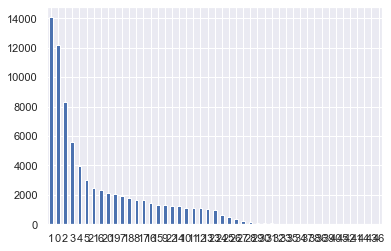

In [12]:
new_trips['trip_duration'].dropna().astype(int).value_counts().plot.bar(rot=0)

In [6]:
new_trips.trip_duration.value_counts()

1.0     14069
0.0     12178
2.0      8328
3.0      5613
4.0      3983
5.0      3013
21.0     2459
6.0      2351
20.0     2126
19.0     2092
7.0      1908
18.0     1771
8.0      1677
17.0     1622
16.0     1452
15.0     1344
9.0      1325
22.0     1271
14.0     1256
10.0     1108
11.0     1092
12.0     1092
13.0     1055
23.0      973
24.0      614
25.0      528
26.0      329
27.0      213
28.0      127
29.0      112
30.0       71
31.0       60
32.0       47
33.0       23
35.0       22
34.0       18
37.0       17
38.0       15
36.0       11
39.0        6
40.0        5
45.0        4
42.0        3
41.0        2
44.0        2
43.0        2
46.0        1
Name: trip_duration, dtype: int64

In [17]:
new_tdfd = new_trips.trip_duration.value_counts().to_frame().rename(columns={'trip_duration': 'new trips'})
old_tdfd = old_trips.trip_duration.value_counts().to_frame().rename(columns={'trip_duration': 'old trips'})
tdfd = pd.concat([new_tdfd, old_tdfd], axis=1).reset_index().rename(columns={'index': 'trip duration'})
tdfd = tdfd.fillna(0).astype(int).sort_values(by='trip duration').set_index('trip duration')
tdfd

,new trips,old trips
trip duration,,
-2,0,1
-1,0,13
0,12178,18541
1,14069,12446
2,8328,6565
3,5613,4387
4,3983,3277
5,3013,2467
6,2351,1895


In [26]:
def preprocess_dfs(new_trips, old_trips):
    new_tdfd = new_trips.trip_duration.value_counts().to_frame().rename(columns={'trip_duration': 'new trips'})
    old_tdfd = old_trips.trip_duration.value_counts().to_frame().rename(columns={'trip_duration': 'old trips'})
    tdfd = pd.concat([new_tdfd, old_tdfd], axis=1).reset_index().rename(columns={'index': 'trip duration'})
    tdfd = tdfd.fillna(0).astype(int).sort_values(by='trip duration').set_index('trip duration')
    return tdfd

total_tdfd = preprocess_dfs(new_trips, old_trips)

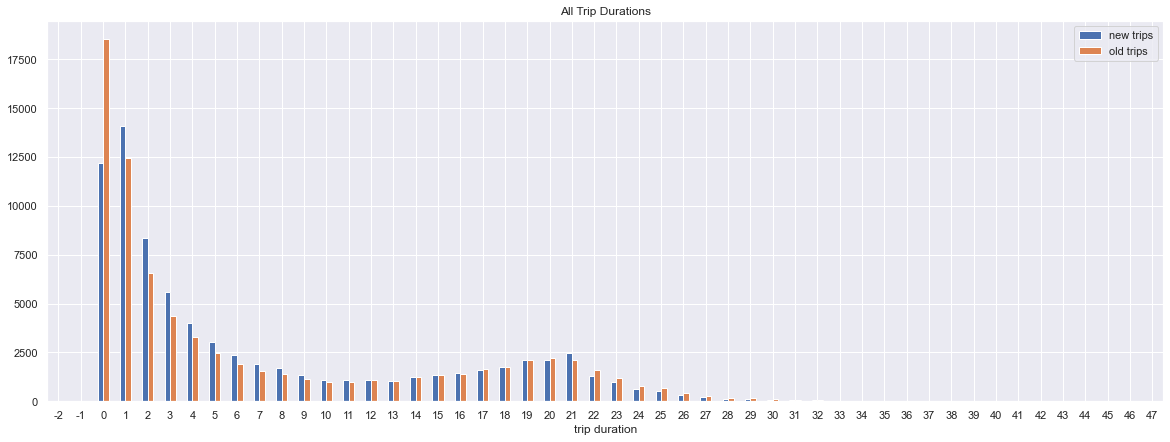

In [27]:
ax = total_tdfd.plot.bar(rot=0, figsize=(20,7))
ax.set_title('All Trip Durations')
plt.show()

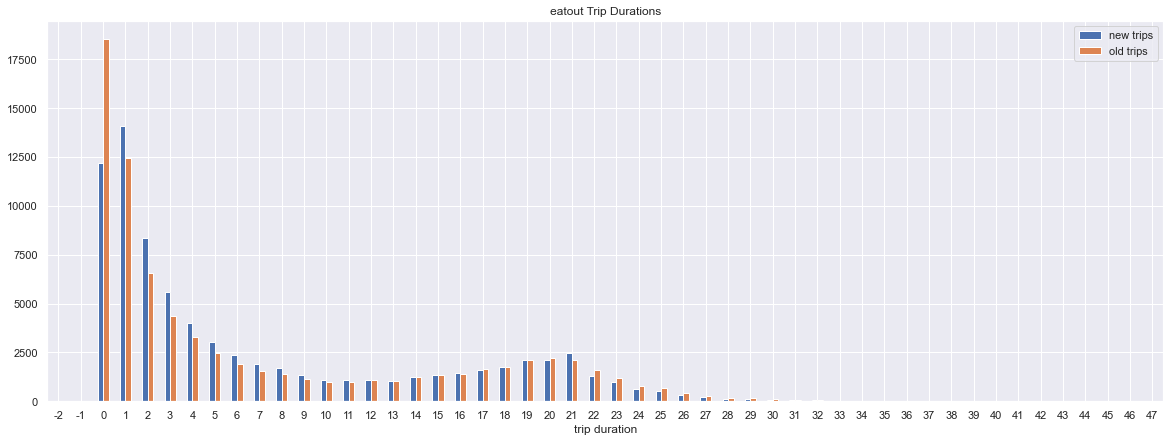

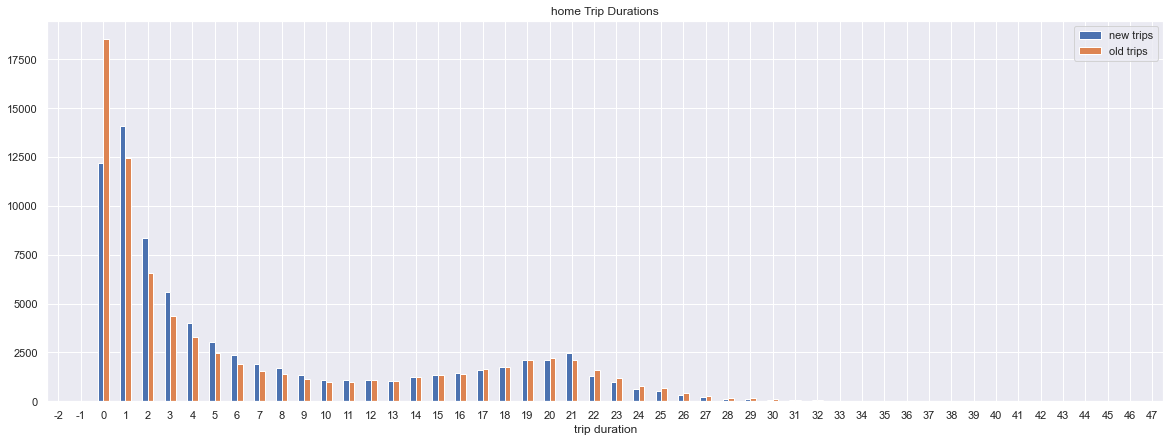

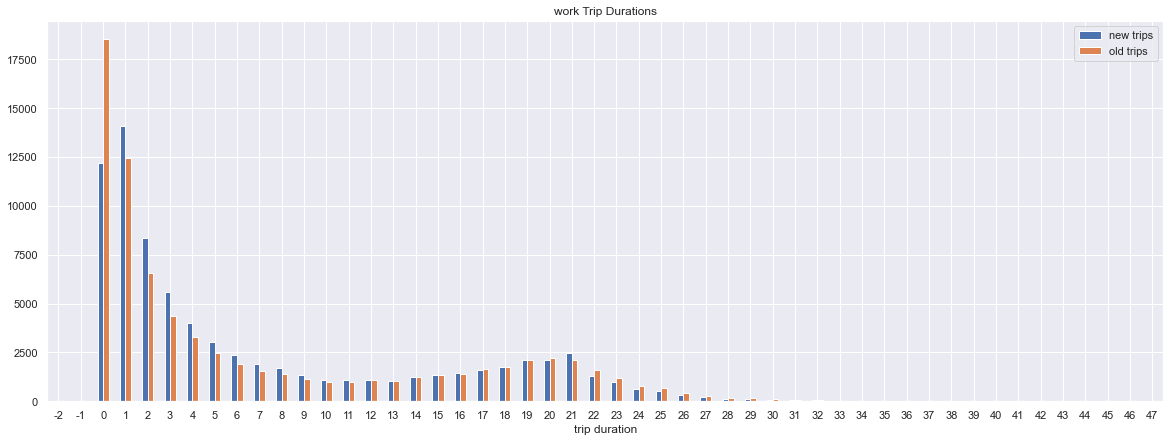

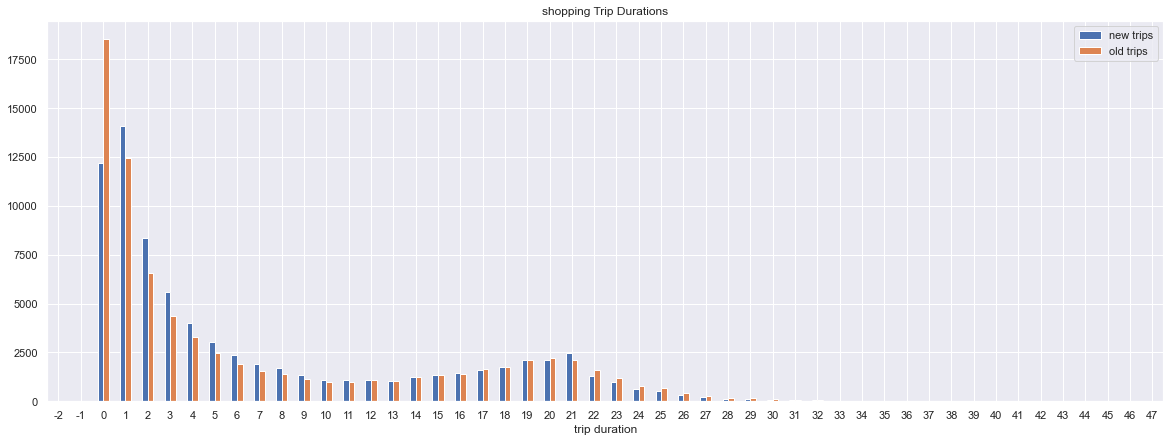

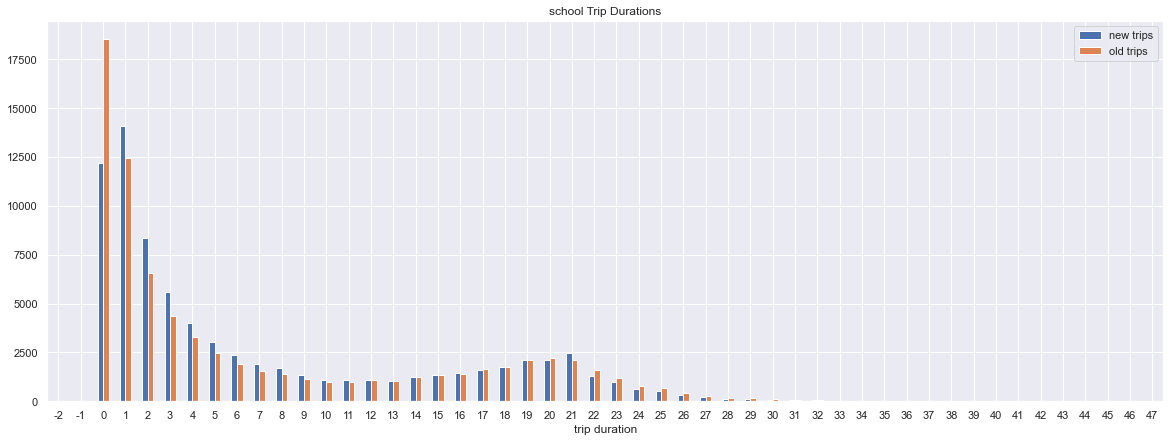

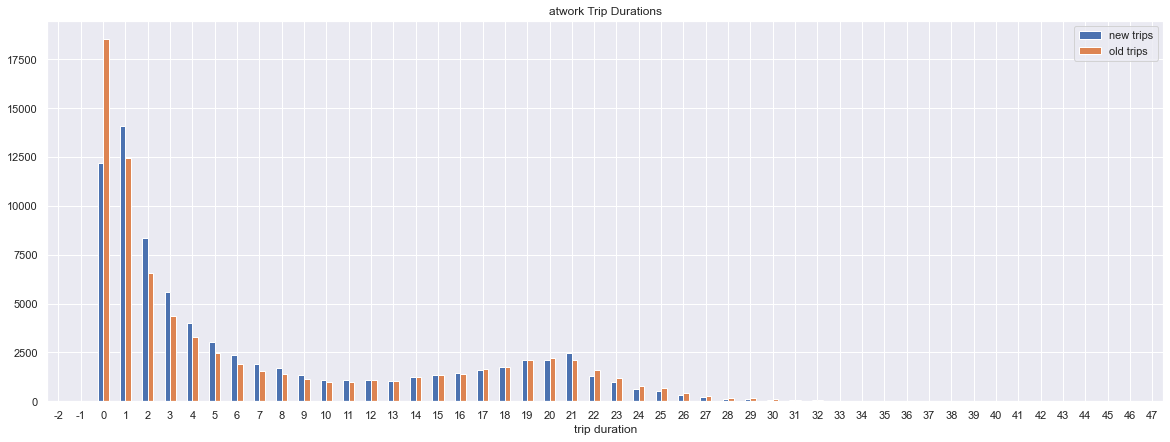

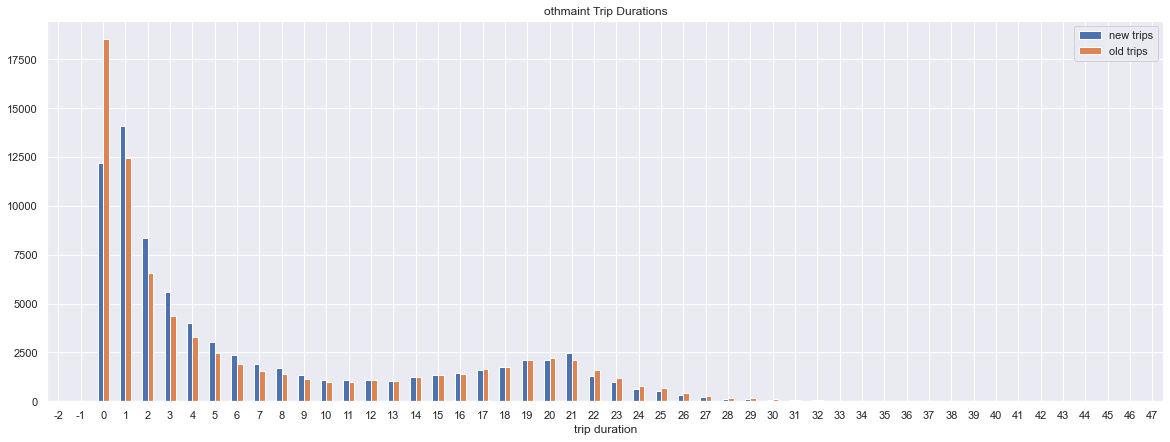

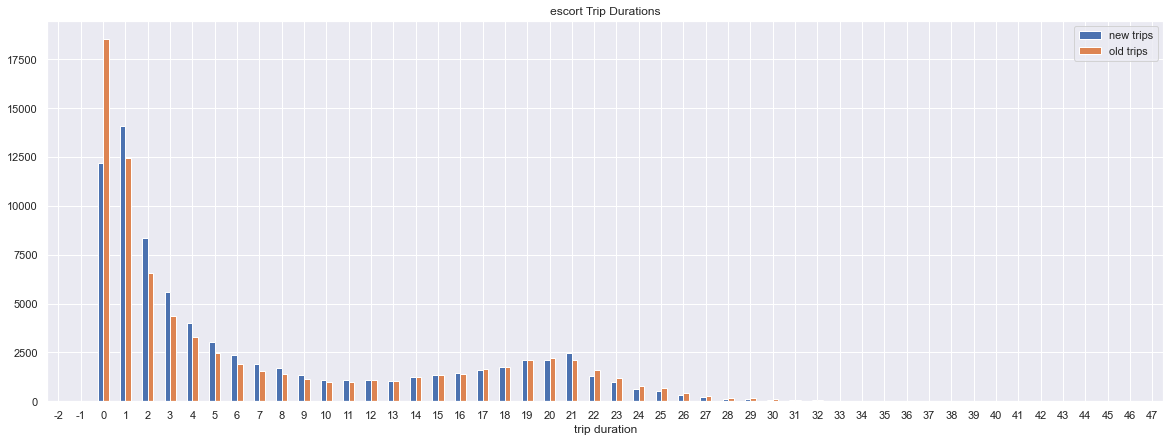

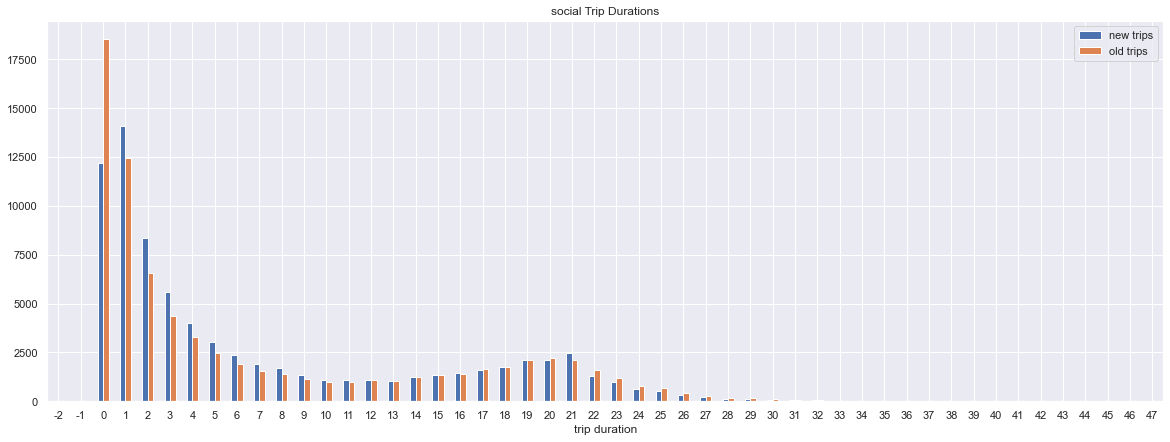

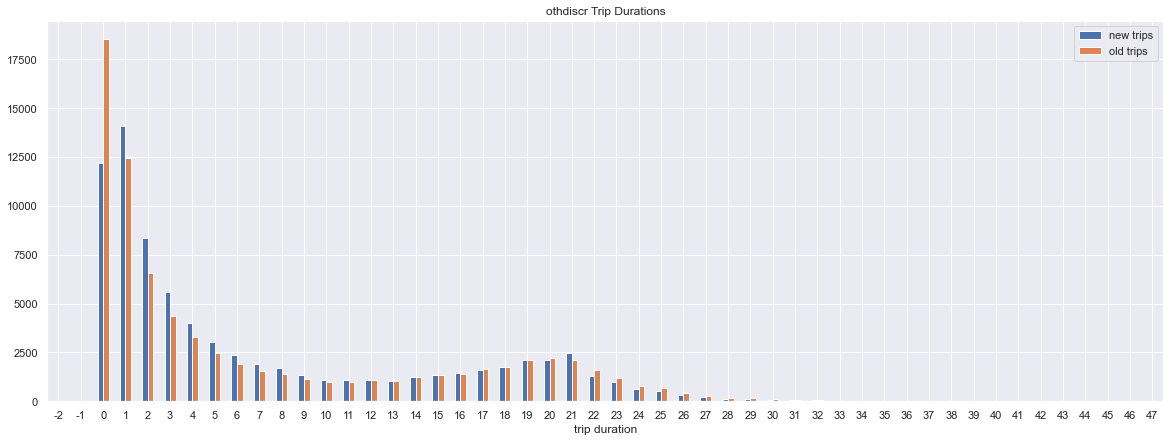

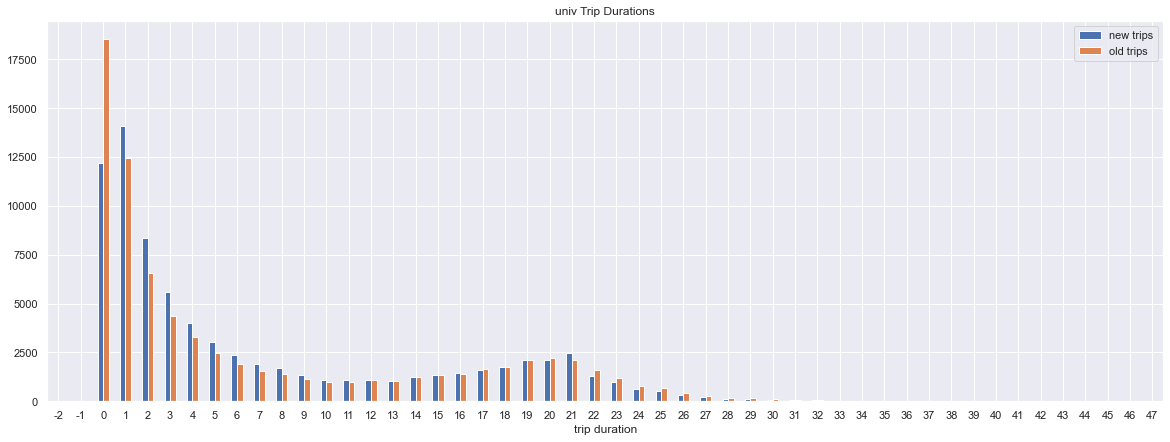

In [29]:
purposes = all_trips.purpose.unique()

for purpose in purposes:
    tdfd = preprocess_dfs(new_trips[new_trips.purpose == purpose], old_trips[old_trips.purpose == purpose])
    ax = total_tdfd.plot.bar(rot=0, figsize=(20,7))
    ax.set_title(f'{purpose} Trip Durations')
    plt.show()

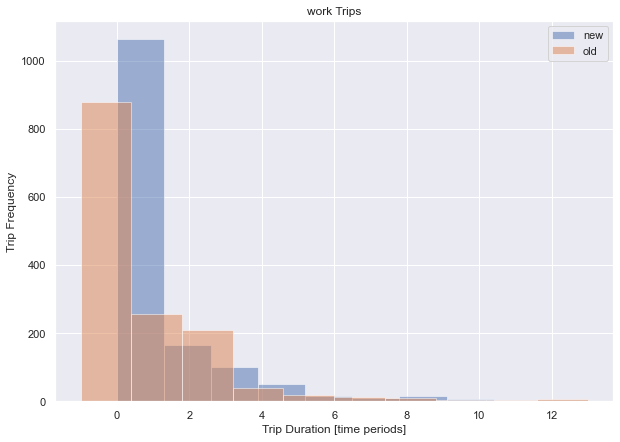

In [36]:
plt.figure(figsize=(10,7))
new_trips[new_trips.purpose == 'work'].trip_duration.hist(label='new', alpha=0.5)
old_trips[old_trips.purpose == 'work'].trip_duration.hist(label='old', alpha=0.5)
plt.legend()
plt.xlabel("Trip Duration [time periods]")
plt.ylabel("Trip Frequency")
plt.title(f"work Trips")
plt.show()